In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

churn_df = pd.read_csv('data/churn.csv', sep=',')
# display(churn_df.head())
# display(churn_df.info())

### Структура набора данных


1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5. Geography — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, **нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов**.

### Предварительный анализ данных

Облегчаем датасет, убрав признаки, которые на понадобятся.

- RowNumber - номер строки
- CustomerId - дентификатор клиента
- Surname - фамилия клиента

In [19]:
churn_df = churn_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
# display(churn_df.head())
# display(churn_df.info())

Добавим несколько описательных признаков, которые будем использовать для отображения на графиках, вместо не очень информативных "1" и "0".

In [20]:
churn_df.loc[churn_df['Exited'] == 1, 'Loyal'] = 'Ушедший'
churn_df.loc[churn_df['Exited'] == 0, 'Loyal'] = 'Лояльный'
churn_df.loc[churn_df['IsActiveMember'] == 1, 'Status'] = 'Активный'
churn_df.loc[churn_df['IsActiveMember'] == 0, 'Status'] = 'Не активный'

### ЗАДАНИЯ

----------------------------------

#### Задание 1.

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

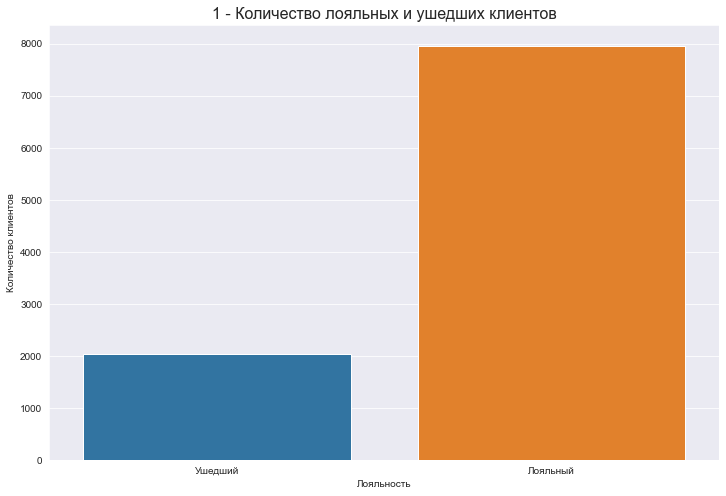

In [21]:
plt.figure(figsize=(12, 8))

g = sns.countplot(
    data=churn_df,
    x='Loyal'
)

g.set_title('1 - Количество лояльных и ушедших клиентов', fontsize=16)

g.set_xlabel('Лояльность')
g.set_ylabel('Количество клиентов')

plt.show()

#### Вывод 1

Количество лояльных клиентов значительно (почти в 4 раза больше) больше ушедших клиентов, что говорит о том, что нет массового оттока клиетов, во всяком случае при рассмотрении данных в целом.

----------------------------------------

#### Задание 2.

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

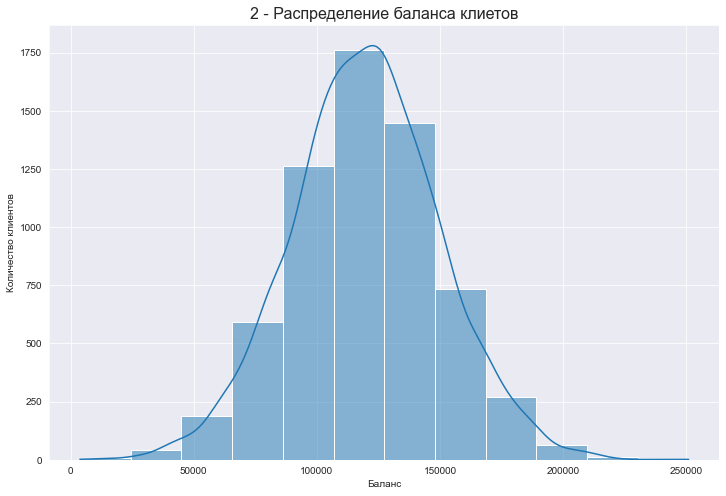

In [22]:
churn_df_filtered = churn_df[churn_df['Balance'] > 2500]
# display(churn_df_filtered)

plt.figure(figsize=(12, 8))

g = sns.histplot(
    data=churn_df_filtered,
    x='Balance',
    bins=12,
    kde=True
)

g.set_title('2 - Распределение баланса клиетов', fontsize=16)

g.set_xlabel('Баланс')
g.set_ylabel('Количество клиентов')

plt.show()

#### Вывод 2.
Баланс основной части клиентов находится в интервале от 50 до 200 тысяч. Баланс большей части клиентов находится в интервале от 80 до 150 тысяч. Можно сделать вывод, что баланс основной доли клиентов состовляет 1-2-х годовой бюждет, что говорит от том, что это клиенты среднего класса. При разработке компании лояльности необходимо учитывать этот момент. Распределение близко к нормальному.

-------------------------

#### Задание 3.
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

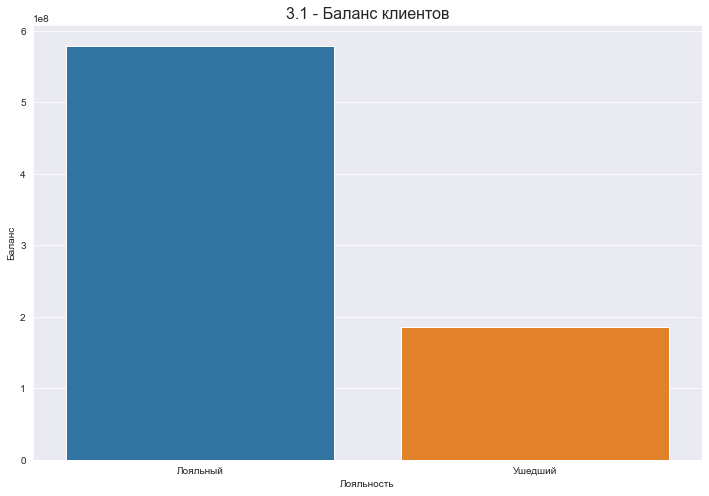

In [23]:
balance_loyal = churn_df_filtered.groupby(['Loyal'], as_index=False)['Balance'].sum()
# display(balance_loyal)


plt.figure(figsize=(12, 8))

g = sns.barplot(
    data=balance_loyal,
    x='Loyal',
    y='Balance'
)


g.set_title('3.1 - Баланс клиентов', fontsize=16)

g.set_xlabel('Лояльность')
g.set_ylabel('Баланс')

plt.show()

Сумма баланса лояльных клиентоа превышает в 3 раза баланс ушедших клиентов.

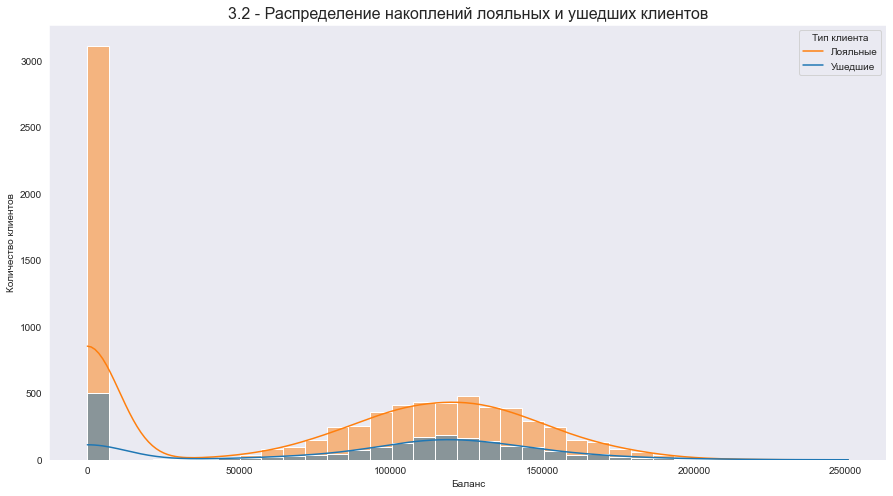

In [24]:
fig = plt.figure(figsize=(15, 8))

g= sns.histplot(
    churn_df,
    x='Balance',
    bins = 35,
    kde = True,
    hue = 'Loyal'
)

g.grid()

g.legend(title='Тип клиента', loc='upper right', labels=['Лояльные', 'Ушедшие'])

g.set_title('3.2 - Распределение накоплений лояльных и ушедших клиентов', fontsize=16)

g.set_xlabel('Баланс')
g.set_ylabel('Количество клиентов')

plt.show()

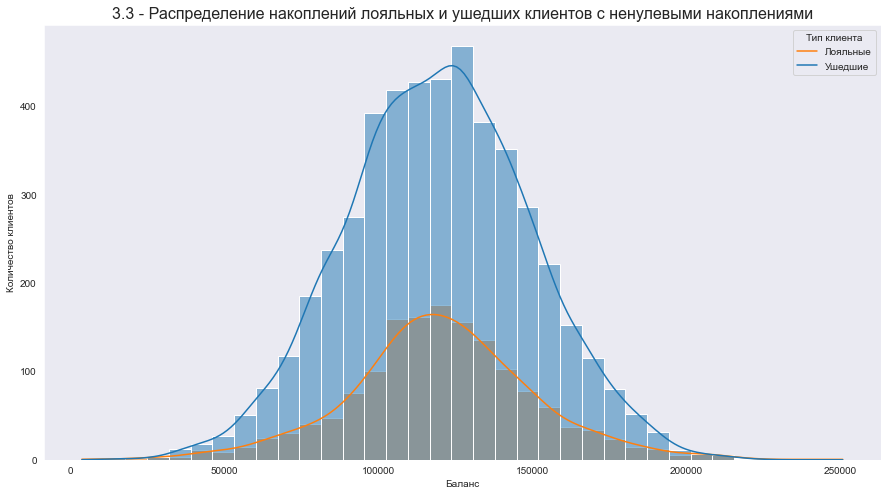

In [25]:
fig = plt.figure(figsize=(15, 8))

g = sns.histplot(
    churn_df[churn_df['Balance'] > 0],
    x='Balance',
    bins = 35,
    kde = True,
    hue = 'Loyal'
)

g.grid()

g.legend(title='Тип клиента', loc='upper right', labels=['Лояльные', 'Ушедшие'])

g.set_title('3.3 - Распределение накоплений лояльных и ушедших клиентов с ненулевыми накоплениями', fontsize=16)

g.set_xlabel('Баланс')
g.set_ylabel('Количество клиентов')

plt.show()

#### Вывод 3.
Распределение в обоих случаях нормальное. Это говорит о том, что накопления лояльных и ушедших клинетов примерно одинаковые. Так же вижно, что ушедших клиентов значительно меньше чем лояльныхы. Самая большая группа клиентов для обоих категорий не имеет накоплений. На графике 3.3 отображено более наглядное распределение балансов, для этого были исключены клиенты с нулевым балансом. Нельзя точно ответить на вопрос, что не устраивает ушедших клиентов, нужны дополнительные исследования.

----------------------

#### Задание 4.
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

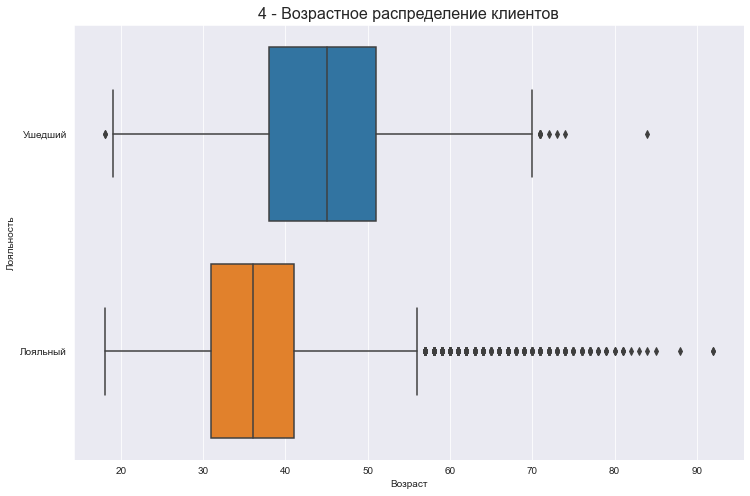

In [26]:
plt.figure(figsize=(12, 8))

g = sns.boxplot(
    data=churn_df,
    y='Loyal',
    x='Age',
    orient='h'
)

g.set_title('4 - Возрастное распределение клиентов', fontsize=16)

g.set_xlabel('Возраст')
g.set_ylabel('Лояльность')

plt.show()

#### Вывод 4.
Большое количество потенциальных выбросов находится в лояльной группе, это клиенты в возрасте от 57 до 92 лет, что говорит о незначительном количестве клиентов в возрастной группе от 55 лет и более. 
Основная группа ушедших клиентов находится в возрасте от 37 лет до 51 года, именно на нее стоит обратить внимание. Сравнивая границы "ящиков" лояльных и ушедших клиентов можно заметить, что переход из лояльных в ушедшие происходит в возрасте от 37 лет до 41 года, когда человек испокаивается в своих метаниях между "работами", заводит семью и переключается на другие заботы. Разработка программы лояльности должна быть рассчитана на привлечение возрастной группы от 37 лет до 51 года.

----------------------------------------

#### Задание 5.
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

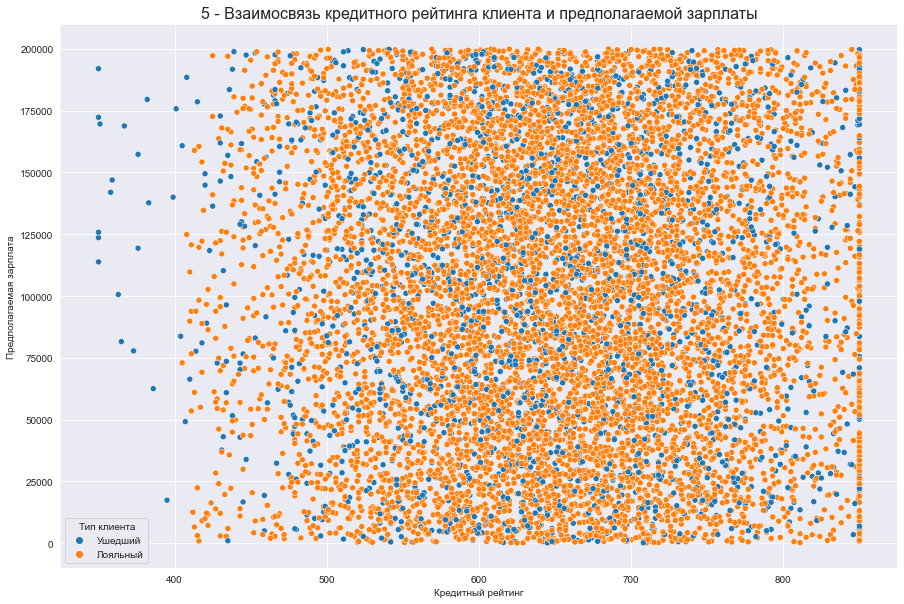

In [27]:
fig = plt.figure(figsize=(15, 10))

g = sns.scatterplot(
    data=churn_df,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Loyal'
)

g.legend(title='Тип клиента', loc='lower left')

g.set_title('5 - Взаимосвязь кредитного рейтинга клиента и предполагаемой зарплаты', fontsize=16)

g.set_xlabel('Кредитный рейтинг')
g.set_ylabel('Предполагаемая зарплата')

plt.show()

#### Вывод 5.
С увеличением кредитного рейтинга "облако" точек становится более концентрированным. Концентрация спадает поле прохождения кредитного рейтинга отметки 750. Отток клиентов на сильно зависит от предполпгаемой заработной платы т.к. наблюдается относительно равномерное распределение точек по секторам, что говорит о том, что услугами банка пользуются люди как с высокой, так и с низкой заработной платой. Кредитный рейтинг усиливает влияние на лояльность в интервале от 500 до 800, люди с высоким кредитным рейтингом более лояльны к банку.

-------------------------------

#### Задание 6.
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

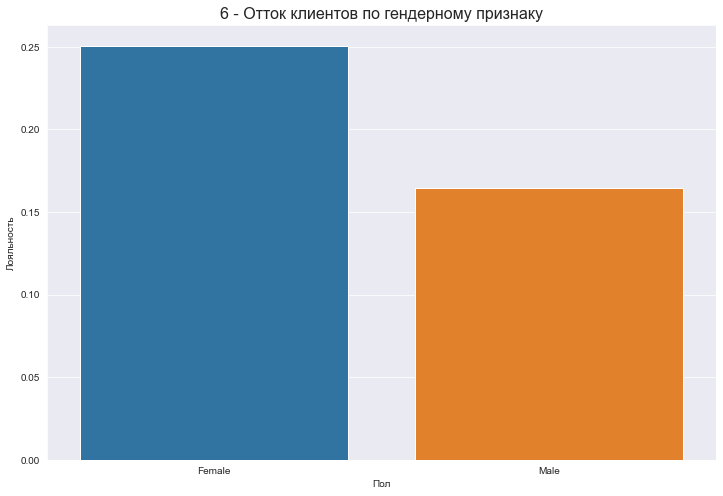

In [28]:
gender_mean = churn_df.groupby(['Gender'], as_index=False)['Exited'].mean()
# display(gender_mean)

plt.figure(figsize=(12, 8))

g = sns.barplot(
    data=gender_mean,
    x='Gender',
    y='Exited'
)

g.set_title('6 - Отток клиентов по гендерному признаку', fontsize=16)

g.set_xlabel('Пол')
g.set_ylabel('Лояльность')

plt.show()

#### Вывод 6.
Отток клиентов-женщин на 34% больше чем клиентов-мужчин.

-----------------------------

#### Задание 7.
Как отток клиентов зависит от числа приобретённых у банка услуг?

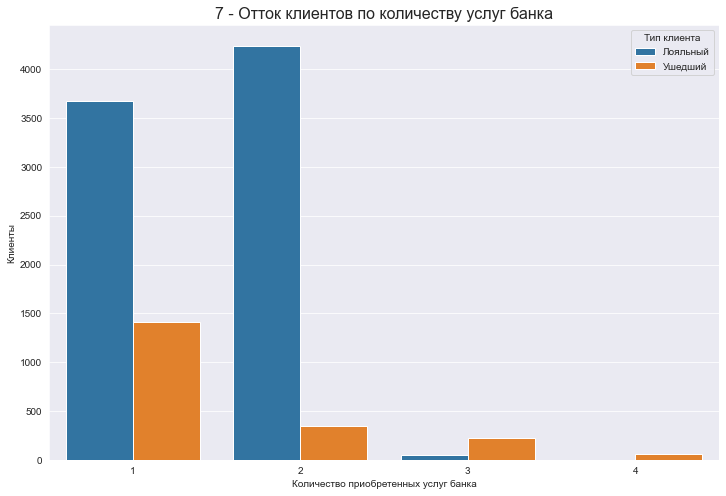

In [29]:
product_loyal = churn_df.groupby(['NumOfProducts', 'Loyal'], as_index=False).count()
# display(product_loyal)

plt.figure(figsize=(12, 8))

g = sns.barplot(
    data=product_loyal, 
    x='NumOfProducts',
    y='Exited',
    hue='Loyal'
)

g.legend(title='Тип клиента', loc='upper right')

g.set_title('7 - Отток клиентов по количеству услуг банка', fontsize=16)

g.set_xlabel('Количество приобретенных услуг банка')
g.set_ylabel('Клиенты')

plt.show()



#### Вывод 7.
Из диаграммы видно, что отток клиентов увеличивается при наличии у клиента 3-х и более услуг банка. В категории клиентов, у которых 2-е услуги лояльных больше на 13%, чем в категории клиентов, у которых одна услуга. В категории 3-х услуг наблюдается существенное падение лояльности на 99%, и на 100% в категории 4-х услуг соответственно.

Можно сделать вывод, что продукты банка не очень привлекательны для клиентов, основная часть клиентов пользуются 1-им или 2-мя продуктами. Суммарное количество клиентов с одним продуктом больше на 10% клиентов с двумя банковскими продуктами, но при этом количество не лояльных клиентов значительно больше на 75%. Получается, что самая привлекательная категория клиентов у банка, те кто пользуется двумя услугами, так как самый высокий процент лояльности. 

Необходима программа по увеличению лояльности среди клиентов с одной услугой, для удержания клиентов в банке. А также проработка дополнительных услуг, которые не являются привлекательными для клиентов.

-------------------------------

#### Задание 8.
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

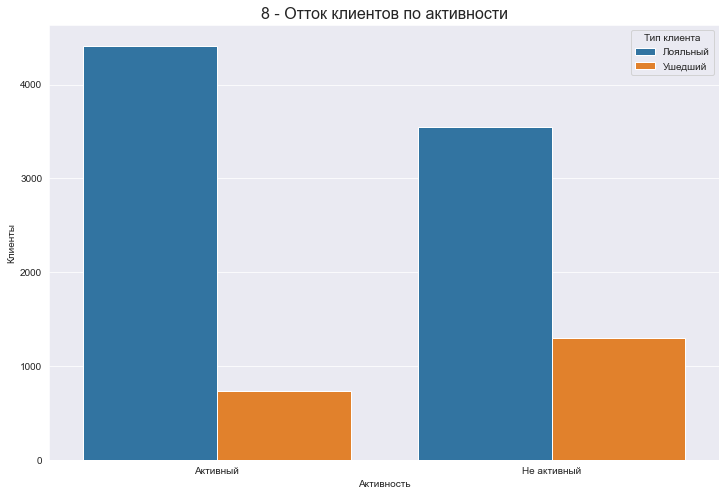

In [30]:
status_loyal = churn_df.groupby(['Status', 'Loyal'], as_index=False).count()
# display(status_loyal)

plt.figure(figsize=(12, 8))

g = sns.barplot(
    data=status_loyal, 
    x='Status',
    y='Exited',
    hue='Loyal'
)

g.legend(title='Тип клиента', loc='upper right')

g.set_title('8 - Отток клиентов по активности', fontsize=16)

g.set_xlabel('Активность')
g.set_ylabel('Клиенты')

plt.show()

#### Вывод 8.
Распределение между активными и не активными примерно 50 на 50 (активных клиентов на 6% больше). Активных, но не лояльных клиентов меньше на 44%, чем в категории не активных клиентов. Необходимо повысить привлекательность банковских продуктов среди не активнох, но при этом лояльных клиентов.

----------------------------------

#### Задание 9.
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

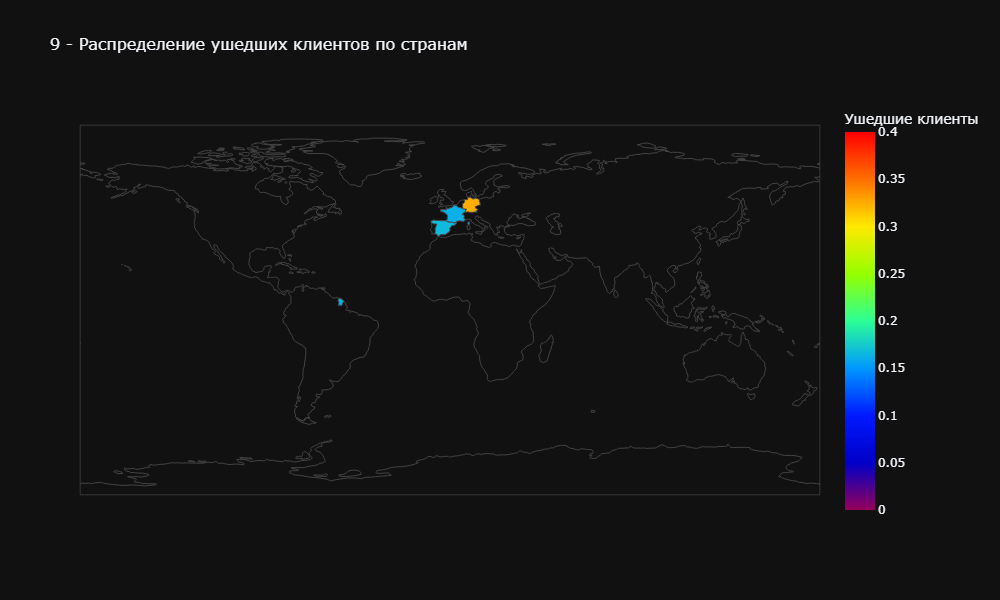

In [31]:
churn_data = churn_df.groupby(['Geography'] , as_index=False).mean()

g = px.choropleth(
    data_frame=churn_data,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    title='9 - Распределение ушедших клиентов по странам',
    width=1000,
    height=600,
    range_color=[0, 0.4],
    color_continuous_scale=px.colors.sequential.Rainbow,
    labels={'Exited':'Ушедшие клиенты'}
)

g.update_layout(
    title_font_size=16,
)
g.show('png')

#### Вывод 9.
Самая большая доля ушедших клиентов из Германии, возможно отток клиентов связан с изменением качества обслуживания на территории страны.

----------------------------


#### Задание 10.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

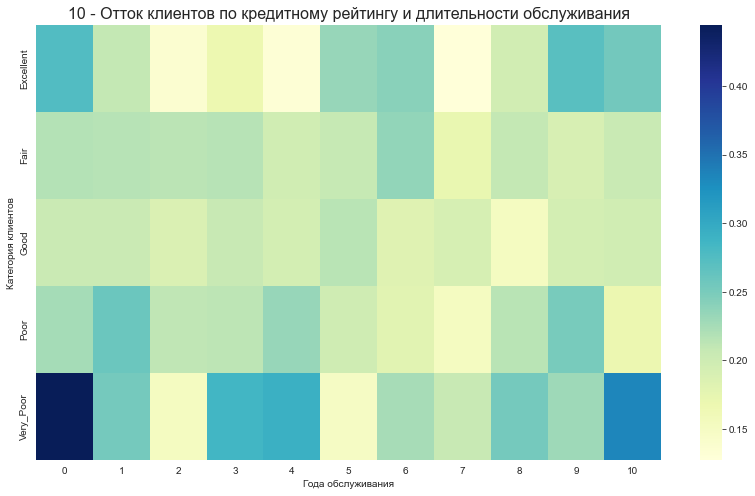

In [32]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

credit_score = churn_df['CreditScore'].apply(get_credit_score_cat)

churn_df['CreditScoreCat'] = credit_score

pivot_data = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
)

plt.figure(figsize=(14, 8))

g = sns.heatmap(data=pivot_data, cmap='YlGnBu')

g.set_title('10 - Отток клиентов по кредитному рейтингу и длительности обслуживания', fontsize=16)

g.set_xlabel('Года обслуживания')
g.set_ylabel('Категория клиентов')

plt.show('png')

#### Вывод 10.
Чаще всего уходят клиенты с низким рейтингом, которые только начали пользоваться услугами банка. Чем выше категория клиентов, тем меньше потерь среди клиентов, но в категории "Excellent" опять увеличивается оттток. Самый низкий уровень оттока клиентов наблюдается на 7 лет. В дальнейшем на отметка 8, 9 и тем более 10 опять начинается расти оттток клиентов, следует обратить внимание на клиентов и длинным сроком сотрудничества.